# EDA - Parte 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

#### Complemento

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   string
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(4), string(1)
memory usage: 62.6+ KB


In [9]:
print(df['gender'].dtype)
df['gender'] = df['gender'].astype(pd.StringDtype())

object
string


In [11]:
df['race/ethnicity'] = df['race/ethnicity'].astype(pd.StringDtype())
df['parental level of education'] = df['parental level of education'].astype(pd.StringDtype())
df['lunch'] = df['lunch'].astype(pd.StringDtype())
df['test preparation course'] = df['test preparation course'].astype(pd.StringDtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   string
 1   race/ethnicity               1000 non-null   string
 2   parental level of education  1000 non-null   string
 3   lunch                        1000 non-null   string
 4   test preparation course      1000 non-null   string
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), string(5)
memory usage: 62.6 KB


In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
print("Gênero:", df['gender'].unique())
print("Raça e Etnia:", df['race/ethnicity'].unique())

Gênero: <StringArray>
['female', 'male']
Length: 2, dtype: string
Raça e Etnia: <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: string


### 2. Limpeza

In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# df = df.drop(['race/ethnicity', 'parental level of education'], axis=1)

### 3. Analisar o Relacionamento entre as Variáveis

In [18]:
# df.corr()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


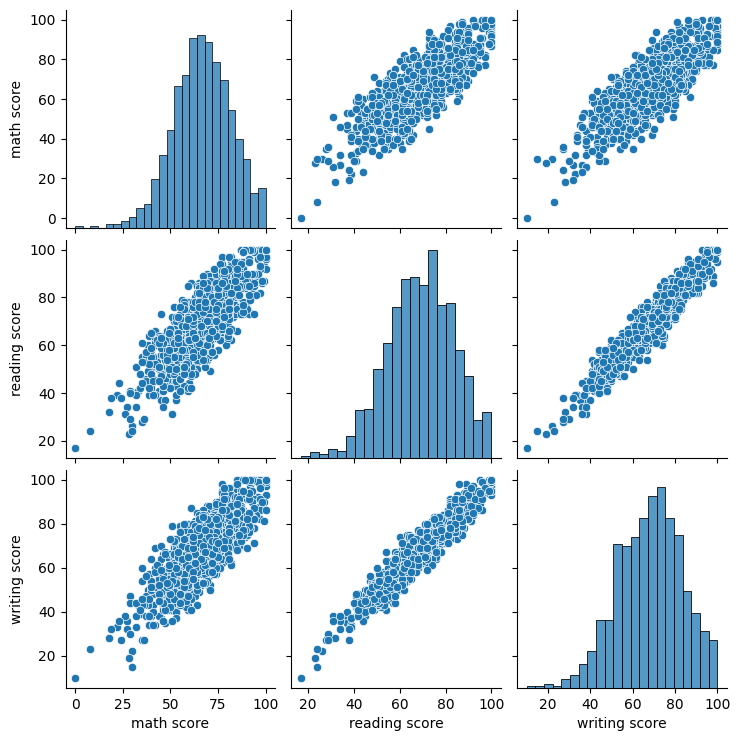

In [19]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


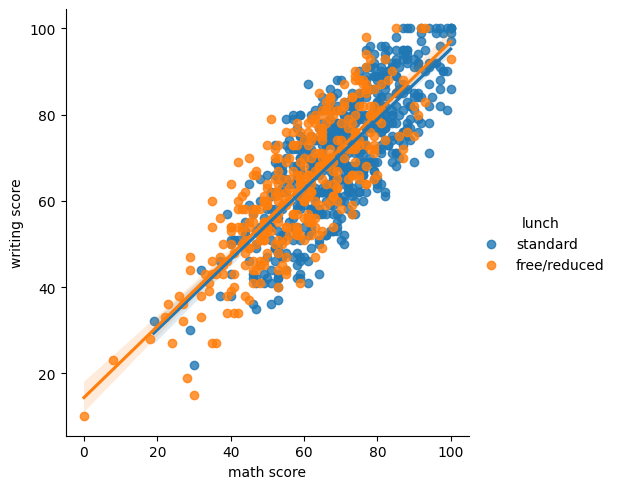

In [21]:
sns.lmplot(x='math score', y='writing score', hue='lunch', data=df)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


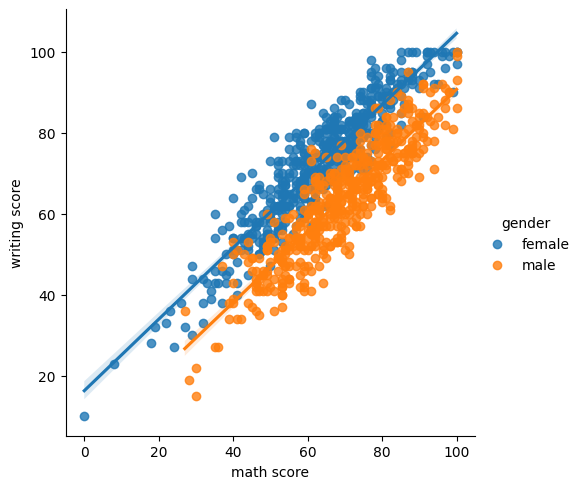

In [26]:
sns.lmplot(x='math score', y='writing score', hue='gender', data=df)
plt.show()

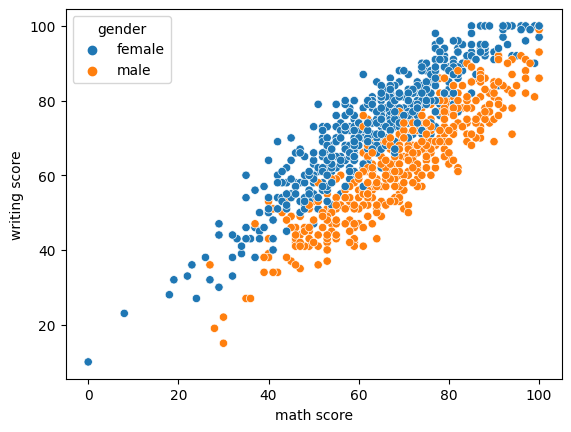

In [27]:
sns.scatterplot(x='math score', y='writing score', hue='gender', data=df)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


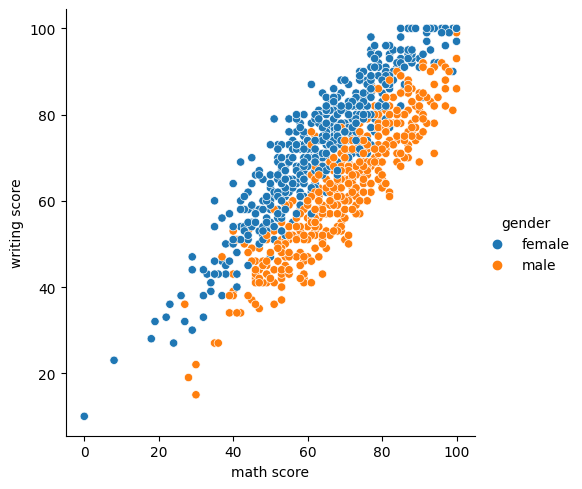

In [28]:
sns.relplot(x='math score', y='writing score', hue='gender', data=df)
plt.show()

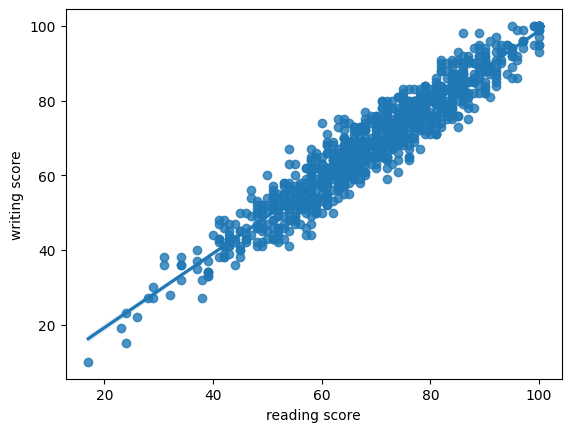

In [33]:
sns.regplot(x='reading score', y='writing score', data=df)
plt.show()

## Bases de Dados

SQL e NoSQL

In [34]:
# mysql-connector-python
!pip install mysql-connector-python

     |████████████████████████████████| 31.6 MB 2.3 MB/s eta 0:00:01    |████████▏                       | 8.1 MB 3.0 MB/s eta 0:00:08
     |████████████████████████████████| 409 kB 2.7 MB/s eta 0:00:01


In [35]:
import mysql.connector

In [37]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='cursopython'
)

In [38]:
cursor = conn.cursor()

### Manutenção dos Objetos

#### CRIAR ENTIDADE

In [41]:
cursor.execute("""
  CREATE TABLE aluno(
    matricula int not null,
    nome varchar(20),
    nascimento date,
    genero char(1),
    primary key(matricula)
  )""")

#### CRUD -> Create -> Insert

In [56]:
cursor.execute("""
  INSERT INTO aluno (matricula, nome, nascimento, genero)
  VALUES (4, 'Mario da Silva', '2003/12/04', '1')
""")

In [52]:
conn.commit()

In [67]:
print(cursor.rowcount)

2


In [58]:
conn.rollback()

### CRUD -> Read (Report) -> Select

In [60]:
cursor.execute("""
  SELECT matricula, nome, nascimento, genero FROM aluno
""")  

In [61]:
res = cursor.fetchall()

In [62]:
type(res)

list

In [63]:
for reg in res:
    print(reg)

(1, 'João da Silva', datetime.date(2001, 12, 1), '1')
(2, 'Maria da Silva', datetime.date(2002, 12, 1), '0')
(3, 'Mario da Silva', datetime.date(2003, 12, 4), '1')


### CRUD -> Update -> Manutenção ou Modificação

In [64]:
cursor.execute("""
  UPDATE aluno SET nascimento = '2003/08/04' WHERE genero = '1' 
""")

In [66]:
conn.commit()

### CRUD -> Delete -> Eliminação ou Exclusão

In [68]:
cursor.execute("""
  DELETE FROM aluno WHERE nascimento = '2003/08/04' 
""")

In [69]:
conn.commit()